In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

### Data Collection and Processing

In [3]:
gold_price = pd.read_csv('gld_price_data.csv')
gold_price

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [4]:
# Statistical measurement of data 
gold_price.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [5]:
# Number of rows and columns
gold_price.shape

(2290, 6)

In [6]:
# getting some basic information about data
gold_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# checking number of missing values
gold_price.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

## Correlation 
1. Positive Correlation
2. Negative Correlation

In [8]:
crl = gold_price.corr(numeric_only=True)

<Axes: >

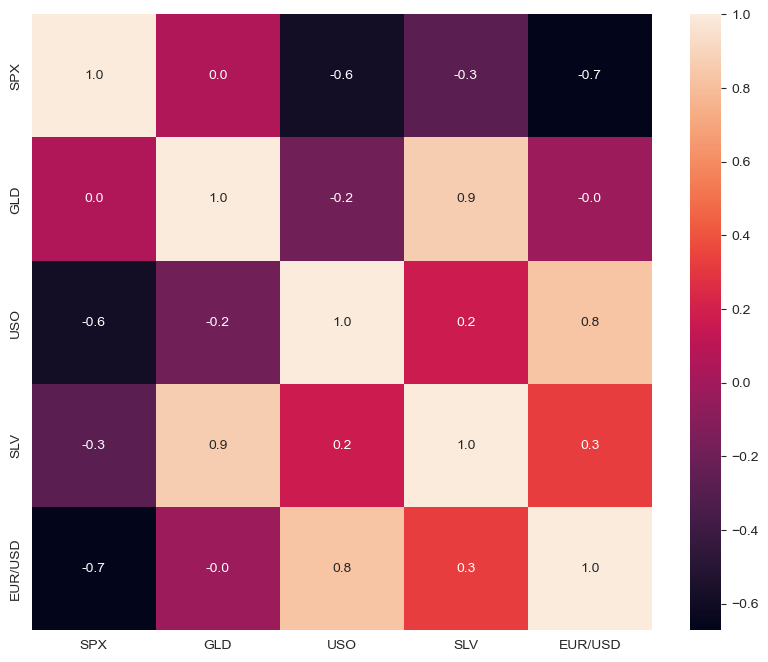

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(crl, annot=True, annot_kws={'size':10},  fmt='.1f')

In [10]:
# Correlation Values of Gold
crl['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

<Axes: xlabel='GLD', ylabel='Count'>

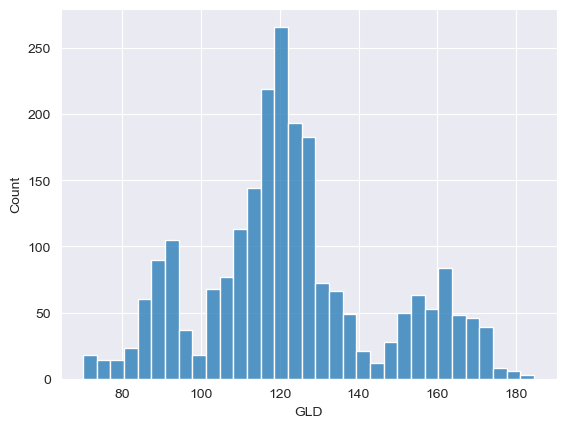

In [11]:
# checking the distribution of gold price 
sns.histplot(gold_price['GLD'])

## Splitting the Features and Target

In [12]:
x = gold_price.drop(['Date', 'GLD'], axis=1)
y = gold_price['GLD']


In [13]:
x

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [14]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

### splitting into training data and testing data

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

## Model Training: Random Forest Regressor

In [16]:
regressor = RandomForestRegressor(n_estimators=100, random_state=2)

In [17]:
# training the model
regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=2)

### Model Evaluation 

In [18]:
# Prediction on test data
test_data_prediction = regressor.predict(x_test)
test_data_prediction

array([168.14679949,  82.24339964, 116.2091003 , 127.75390099,
       120.68560157, 154.80879758, 149.66389771, 126.11980063,
       117.46109873, 126.11890065, 116.8192012 , 171.67110076,
       142.04309863, 167.79609845, 115.15130022, 117.81390058,
       139.19030274, 170.20570075, 159.16530239, 159.13609887,
       155.07470026, 125.24170007, 176.16490017, 156.86490313,
       125.25400031,  93.86899998,  76.7901002 , 120.7469001 ,
       119.14609953, 167.59019972,  88.18590001, 125.25969994,
        91.08590068, 117.57440042, 121.07519911, 136.48370094,
       115.53470088, 115.35480078, 149.37649963, 107.14580109,
       104.23500253,  87.24959778, 126.49140041, 118.20639983,
       153.30559911, 119.71289971, 108.43879997, 108.02389812,
        92.98830022, 127.21629761,  75.56760045, 113.78179947,
       121.32899992, 111.32629931, 118.89129884, 120.79729954,
       158.50929988, 168.40700101, 147.09549665,  85.79419855,
        94.23150038,  86.79829922,  90.46990009, 119.01

## Compare actual values and predicted value

In [19]:
# R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print('R Squared error: ', error_score)

R Squared error:  0.9886241205255454


In [20]:
y_test = list(y_test)

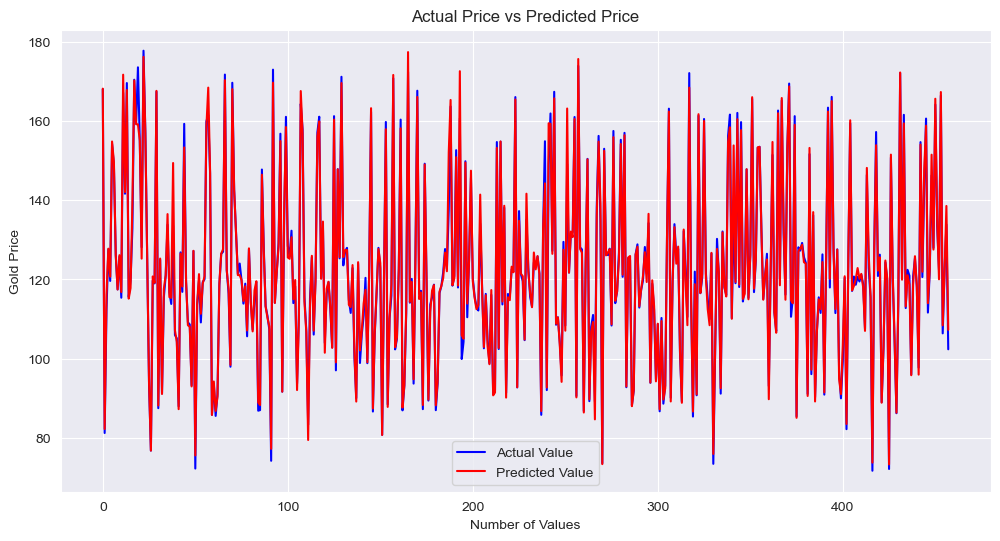

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='red', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()